I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import statistics
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
# CIAO Imports
# import ciao_contrib.runtool
# from ciao_contrib.runtool import *
# CUSTOM Imports
from data_extraction_functions import *
from data_plotting_functions import *
from data_exploration_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('Full', 'All', 'New', 'Bona'), value='Full')

II. Number of Bins

In [2]:
# Set ID
set_id = set_widget.value
# Reduce data for useful input to data representation
# df_eventfiles = pd.read_csv(f'{global_path}/{set_id}/eventfiles-{set_id}.csv')
# df_properties = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
# df_eventfiles_input, df_properties_input = data_reduction_fun(df_eventfiles, df_properties,global_path,set_id,min_counts = 40)
# Load Input
df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')
# Group Data
df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')
# Filter for Minimum 40 events
#df_eventfiles_group = df_eventfiles_group.filter(lambda x: len(x) > 49).groupby('obsreg_id')
#keep_obsreg = list(df_eventfiles_group.groups.keys())
#df_properties_group = df_properties_group.filter(lambda x: x.name in keep_obsreg).groupby('obsreg_id')

# Print info
print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

# t bins BB calculations
bb_id = list(df_properties_input.loc[(df_properties_input['var_prob_b'] >= 0.6) | (df_properties_input['var_prob_h']  >= 0.6) | (df_properties_input['var_prob_m']  >= 0.6) | (df_properties_input['var_prob_s'] >= 0.6), 'obsreg_id'])
bb_id = list(df_properties_input.loc[(df_properties_input['var_prob_b'] >= 0.9), 'obsreg_id'])
bb_id = list(df_properties_input.loc[(df_properties_input['var_prob_b'] >= 0.9) | (df_properties_input['var_prob_h']  >= 0.9) | (df_properties_input['var_prob_m']  >= 0.9) | (df_properties_input['var_prob_s'] >= 0.9), 'obsreg_id'])
# bb_id = list(df_properties_input.loc[(df_properties_input['var_index_b'] >= 4),'obsreg_id'])
df_bb_evt = df_eventfiles_group.filter(lambda x: x.name in bb_id).groupby('obsreg_id')
# print(len(filtered_col1))
print("Number of Eventfiles for BB: ", df_bb_evt.ngroups)

Number of Eventfiles:  95473
Number of Property Sets:  95473
Number of Eventfiles for BB:  13194


# 1. Plot N and T

Load

In [2]:
# Set ID
set_id = set_widget.value
# Describe 
describe = 'TEST'
with open(f'{global_path}/{set_id}/nbin_E_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_E_list = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_dt_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_dt_list = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_t_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_t_list = pickle.load(file)

# Load BB
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list = pickle.load(file)

# Open T
with open(f'{global_path}/{set_id}/Tlist-{set_id}-{describe}.pickle', "rb") as file:
    T_list = pickle.load(file)
# Open N
with open(f'{global_path}/{set_id}/Nlist-{set_id}-{describe}.pickle', "rb") as file:
    N_list = pickle.load(file)

# Open IDs
with open(f'{global_path}/{set_id}/idpass-{set_id}-{describe}.pickle', "rb") as file:
    id_pass = pickle.load(file)
with open(f'{global_path}/{set_id}/idfail-{set_id}-{describe}.pickle', "rb") as file:
    id_fail = pickle.load(file)

# Save BB
describe = 'TEST5'
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list = pickle.load(file)
# Save BB
with open(f'{global_path}/{set_id}/nbin_BB2-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list2 = pickle.load(file)
# Save BB
with open(f'{global_path}/{set_id}/nbin_BB206-{set_id}-{describe}.pickle', "rb") as file:
   bb_t_list3 = pickle.load(file)
# Save BB
with open(f'{global_path}/{set_id}/nbin_BB201-{set_id}-{describe}.pickle', "rb") as file:
   bb_t_list4 = pickle.load(file)

Plot

181.20818887410837
51.47049161955997


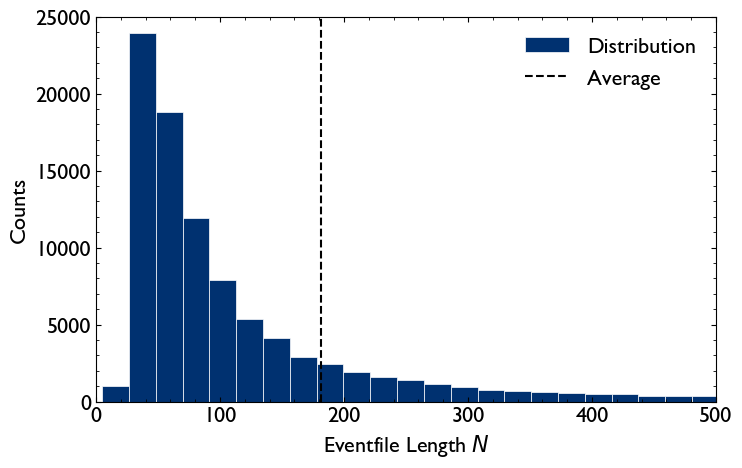

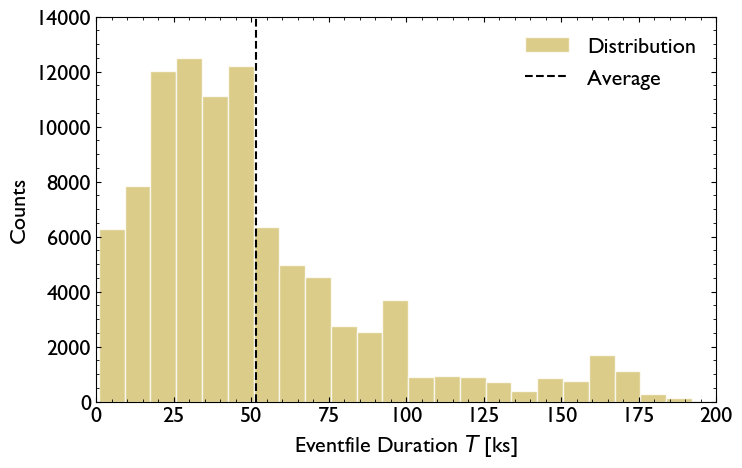

In [3]:
def N_plotter(list,xlim = [25,1000],ylim=[0,25000],binning = 'fd', avg = True, colour = 'bright', edgecol = 'black', bins = 100, alpha=0.5,leg_frame = False):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Define Color  Settings
    dark = '#003170'
    bright = '#cfbd62'
    if colour == 'dark':
        col = dark
    elif colour == 'bright':
        col = bright
    # Freedman-Diaconis rule N
    iqr = np.subtract(*np.percentile(list, [75, 25], axis=0)) #IQ range
    binwidth = 2 * iqr / (len(list) ** (1/3))
    nbins = int(np.ceil((max(list) - min(list)) / binwidth))
    # Create subplots 
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    # Plot Energy Binning histograms
    if binning == 'fd':
        axs.hist(list, color = col,bins = nbins,edgecolor='white',linewidth=0.5,alpha=alpha,label = 'Distribution')
    else:
        axs.hist(list, color = col,bins = bins,edgecolor='white',linewidth=0.5,alpha=alpha,label = 'Distribution')
    axs.set_xlabel(r'Eventfile Length $N$')
    axs.set_xlim(xlim)
    axs.set_ylim(ylim)
    axs.set_ylabel('Counts')
    axs.minorticks_on()
    axs.tick_params(which='both', direction='in', top=True, right=True)
    if avg:
        average = sum(list) / len(list)
        print(average)
        axs.axvline(average,color='black',linestyle='--',label = 'Average')
        axs.legend(loc='upper right',frameon = leg_frame)
    else:
        pass
    return

def T_plotter(list,xlim = [0,180],ylim=[0,12500],binning = 'fd', avg = True, colour = 'bright', edgecol = 'black', bins = 100, alpha=0.5,leg_frame = False):
    #Unit Conversion
    list = np.array(list) / 1000
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Define Color  Settings
    dark = '#003170'
    bright = '#cfbd62'
    if colour == 'dark':
        col = dark
    elif colour == 'bright':
        col = bright
    # Freedman-Diaconis rule N
    iqr = np.subtract(*np.percentile(list, [75, 25], axis=0)) #IQ range
    binwidth = 2 * iqr / (len(list) ** (1/3))
    nbins = int(np.ceil((max(list) - min(list)) / binwidth))
    # Create subplots 
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    # Plot Energy Binning histograms
    if binning == 'fd':
        axs.hist(list, color = col,bins = nbins,edgecolor='white',alpha=alpha, linewidth=1,label = 'Distribution')
    else:
        axs.hist(list, color = col,bins = bins,edgecolor='white',alpha=alpha, linewidth=1,label = 'Distribution')
    axs.set_xlabel(r'Eventfile Duration $T$ [ks]')
    axs.set_xlim(xlim)
    axs.set_ylim(ylim)
    axs.set_ylabel('Counts')
    axs.minorticks_on()
    axs.tick_params(which='both', direction='in', top=True, right=True)
    if avg:
        average = sum(list) / len(list)
        print(average)
        axs.axvline(average,color='black',linestyle='--',label = 'Average')
        axs.legend(loc='upper right', frameon = leg_frame)
    else:
        pass
    return

imperial = '#003E74'
harvard = '#A51C30'
silver = '#777777'
gold = '#cfbd62'
gold = '#dfc16d' #new but maybe worse

N_plotter(N_list,xlim = [0,500],ylim = [0,25000],avg = 'on',colour = 'dark',edgecol = 'white',binning = 'no', bins = 4000,alpha=1)
T_plotter(T_list,xlim = [0,200],ylim = [0,14000],avg = 'on',colour = 'bright',edgecol = 'white',binning = 'no', bins = 800,alpha=0.75)

# 2. Plot E and dt bins

E 15
dt 16
Avg dt; 13.159209927742454
22
20


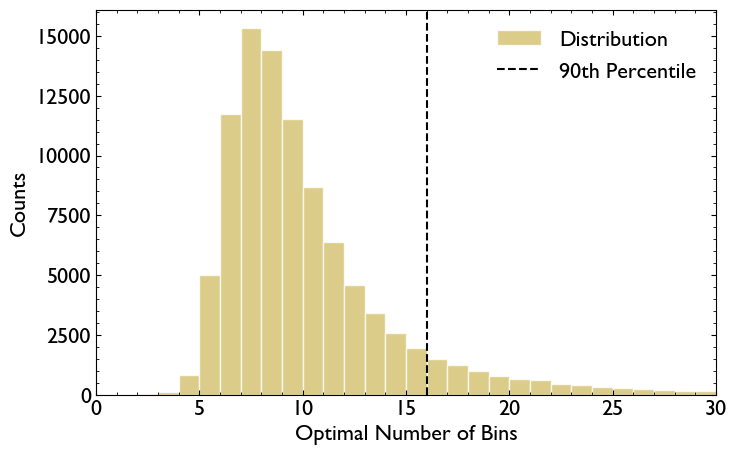

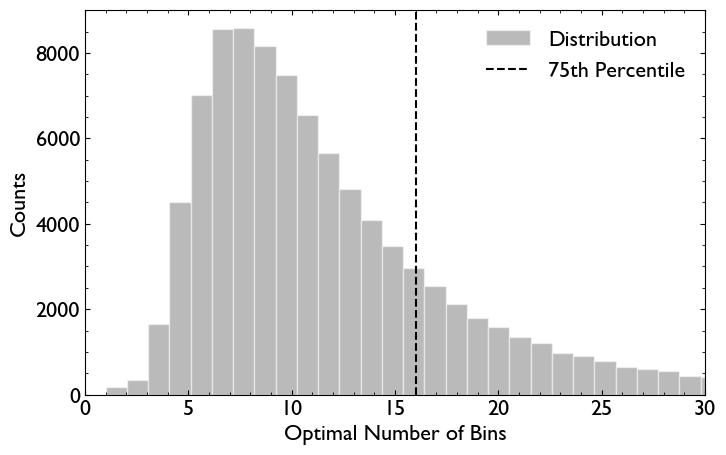

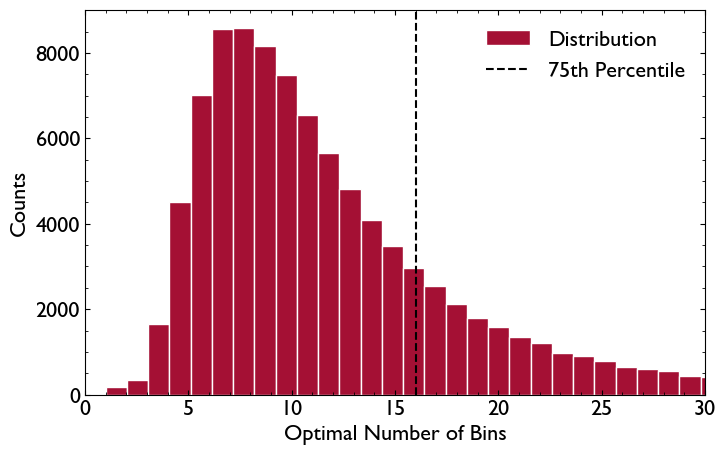

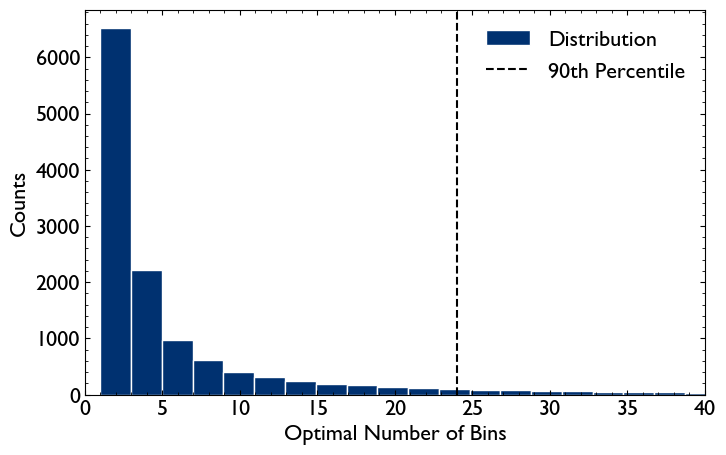

In [9]:
def bin_plotter(bin_list,xlim = [0,40],nbins = 100,percentile = '90',colour = 'bright', edgecol = 'black',perc = 24,alpha=0.5,leg_frame = False):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Define Color  Settings
    dark = '#003170'
    dark = '#003E74' # imperial
    bright = '#cfbd62'
    grey = '#777777'

    col = colour
    if colour == 'dark':
        col = dark
        if edgecol == 'same':
            edgecol = dark
    elif colour == 'bright':
        col = bright
        if edgecol == 'same':
            edgecol = bright
    elif colour == 'grey':
        col = grey
        if edgecol == 'same':
            edgecol = grey
    # Create subplots 
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    # Plot Binning without percentiles
    axs.hist(bin_list, color = col,bins=nbins,edgecolor = edgecol,label = 'Distribution',alpha=alpha)
    axs.set_xlabel('Optimal Number of Bins')
    axs.set_ylabel('Counts')
    axs.set_xlim(xlim)
    axs.minorticks_on()
    axs.tick_params(which='both', direction='in', top=True, right=True)
    if percentile == '90':
        axs.axvline(perc,color='black',linestyle='--',label = r'90th Percentile')
        axs.legend(loc='upper right',frameon = leg_frame)
    elif percentile == '75':
        axs.axvline(perc,color='black',linestyle='--',label = r'75th Percentile')
        axs.legend(loc='upper right',frameon = leg_frame)
    return

imperial = '#003E74'
harvard = '#A51C30'
silver = '#777777'
silver = '#C0C0C0'
gold = '#cfbd62'
gold = '#dfc16d' #new but maybe worse

perc_E = np.percentile(nbin_E_list,99.9)
n_90E = int(np.percentile(nbin_E_list, 90))
print('E', n_90E)
filt_E = [x for x in nbin_E_list if x <= perc_E]
bin_plotter(filt_E,xlim = [0,30],nbins = 45,percentile = '90',colour = 'bright', edgecol = 'white',perc = 16,alpha=0.75,leg_frame = False)

perc_dt = np.percentile(nbin_dt_list,99)
n_75dt = int(np.percentile(nbin_dt_list, 75))
print('dt', n_75dt)
filt_dt = [x for x in nbin_dt_list if x <= perc_dt]
avg_dt = sum(filt_dt)/len(filt_dt)
print('Avg dt;', avg_dt)
bin_plotter(filt_dt,xlim = [0,30],nbins = 71,percentile = '75',colour = 'grey', edgecol = 'white',perc = 16,alpha=0.5,leg_frame = False)
bin_plotter(filt_dt,xlim = [0,30],nbins = 71,percentile = '75',colour = '#A41034', edgecol = 'white',perc = 16,alpha=1,leg_frame = False)

t_list = bb_t_list4
perc_t = np.percentile(t_list,99)
n_90t = int(np.percentile(t_list, 90))
print(n_90t)
filt_t = [x for x in t_list if x <= perc_t]
n_90t_2 = int(np.percentile(filt_t, 90))
print(n_90t_2)
bin_plotter(filt_t,xlim = [0,40],nbins = 132,percentile = '90',colour = 'dark', edgecol = 'white',perc = 24,alpha=1,leg_frame = False)

In [ ]:
# # Set ID for 
# set_id = set_widget.value
# perc_dt = np.percentile(nbin_dt_list,98)
# filt_dt = [x for x in nbin_dt_list if x <= perc_dt]
# perc_E = np.percentile(nbin_E_list,99)
# filt_E = [x for x in nbin_E_list if x <= perc_E]
# perc_t = np.percentile(bb_t_list,100)
# filt_t = [x for x in bb_t_list if x <= perc_t

# # binning_plotter(filt_E,show_percentiles = True, xlim =[0,30],nbins = 45, farbe = 'gruen',title = r'$\epsilon$ Bins')
# # binning_plotter(filt_dt,show_percentiles = True, xlim =[0,35],nbins = 45, farbe = 'lila',title = r'$\delta\tau$ Bins')
# binning_plotter(filt_t,show_percentiles = True, xlim =[0,36],nbins = 45, farbe = 'lila',title = r'$\delta\tau$ Bins')

# # NT_binning_plotter(T_list,xlim = [0,180000], farbe = 'blau',T_or_N='T')
# # NT_binning_plotter(N_list,xlim = [25,800], farbe = 'rot',T_or_N='N')

# 3. RUNS

E and dt Bins

In [3]:
nbin_E_list = []
nbin_dt_list = []
nbin_t_list = []
bb_t_list = []
bb_t_list06 = []

T_list = []
N_list = []

count = 0
fails = 0
count_limit = df_eventfiles_group.ngroups
# count_limit = df_bb_evt.ngroups
id_fail = []
id_pass = []

for id_name, df in df_eventfiles_group:
# for id_name, df in df_bb_evt:
    try:
        # Copy df
        df = df.copy()
        df.sort_values(by='time', inplace = True) 
        df.reset_index(drop=True, inplace = True)
        # Define histogram boundaries
        E_start = np.log10(500)
        E_end = np.log10(7000)
        t_start = 0
        t_end = 1
        dt_start = 0
        dt_end = 1
        # IDs
        obsid = id_name.split("_")[0]
        regid = id_name.split("_")[1]
        # Eventfile length and duration
        N_length = len(df) 
        T_duration = max(df["time"])-min(df["time"])
        # Add E, t, dt columns
        df["E"] = np.log10(df["energy"])
        E_min = min(df["E"])
        E_max = max(df["E"])
        df["t"] = (df["time"]-min(df["time"]))/(max(df["time"])-min(df["time"]))
        df["delta_time"] = df['time'].diff().shift(-1)
        df = df[df["delta_time"].notna()]
        df["dt"] = (df['delta_time'] - df['delta_time'].mean()) / df['delta_time'].std() 
        dt_min =  min(df["dt"])
        dt_max =  max(df["dt"])
        df["dt"] = (df["dt"]-min(df["dt"]))/(max(df["dt"])-min(df["dt"]))
  
        # Freedman-Diaconis rule ENERGY
        iqr_E = np.subtract(*np.percentile(df['E'], [75, 25], axis=0)) #IQ range
        binwidth_E = 2 * iqr_E / (len(df['E']) ** (1/3))
        nbins_E = (df['E'].max() - df['E'].min()) / binwidth_E
        nbins_E = int(np.ceil((E_end - E_start) / (E_max - E_min) * nbins_E))
        # Freedman-Diaconis rule DT
        iqr_dt = np.subtract(*np.percentile(df['dt'], [75, 25], axis=0)) #IQ range
        binwidth_dt = 2 * iqr_dt / (len(df['dt']) ** (1/3))
        nbins_dt = int(np.ceil((df['dt'].max() - df['dt'].min()) / binwidth_dt))
        # Freedman-Diaconis rule T
        iqr_t = np.subtract(*np.percentile(df['t'], [75, 25], axis=0)) #IQ range
        binwidth_t = 2 * iqr_t / (len(df['t']) ** (1/3))
        nbins_t = int(np.ceil((df['t'].max() - df['t'].min()) / binwidth_t))
        # Bayesian Blocks Rule 
        bb_bins = astats.bayesian_blocks(df['time'], fitness='events', p0=1)
        bb_bins06 = astats.bayesian_blocks(df['time'], fitness='events', p0=0.6)
        bb_nbins = len(bb_bins) - 1
        bb_nbins06 = len(bb_bins06) - 1

        # Append optimal bins lists
        nbin_E_list.append(nbins_E)
        nbin_dt_list.append(nbins_dt)
        nbin_t_list.append(nbins_t)
        T_list.append(T_duration)
        N_list.append(N_length)

        bb_t_list.append(bb_nbins)
        bb_t_list06.append(bb_nbins06)

        count = count + 1
        print(f'Counter: {count} / {count_limit}')
        clear_output(wait=True)
        id_pass.append(id_name)
    except:
        # Fails
        fails = fails + 1
        print(f'Fails: {fails} / {count_limit}')
        clear_output(wait=True)
        id_fail.append(id_fail)

# Set ID
set_id = set_widget.value
# Describe 
describe = 'TEST'
# Save FD
with open(f'{global_path}/{set_id}/nbin_E_fd-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(nbin_E_list, file)
with open(f'{global_path}/{set_id}/nbin_dt_fd-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(nbin_dt_list, file)
with open(f'{global_path}/{set_id}/nbin_t_fd-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(nbin_t_list, file)
# Save BB
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bb_t_list, file)
with open(f'{global_path}/{set_id}/nbin_BB06-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bb_t_list06, file)

# Save T
with open(f'{global_path}/{set_id}/Tlist-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(T_list, file)
# Save N
with open(f'{global_path}/{set_id}/Nlist-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(N_list, file)

# Save IDs
with open(f'{global_path}/{set_id}/idpass-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(id_pass, file)
with open(f'{global_path}/{set_id}/idfail-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(id_fail, file)

Counter: 95471 / 95473


In [6]:
# Set ID
set_id = set_widget.value
# Describe 
describe = 'TEST'
with open(f'{global_path}/{set_id}/nbin_E_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_E_list = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_dt_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_dt_list = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_t_fd-{set_id}-{describe}.pickle', "rb") as file:
    nbin_t_list = pickle.load(file)

# Load BB
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list = pickle.load(file)

# Open T
with open(f'{global_path}/{set_id}/Tlist-{set_id}-{describe}.pickle', "rb") as file:
    T_list = pickle.load(file)
# Open N
with open(f'{global_path}/{set_id}/Nlist-{set_id}-{describe}.pickle', "rb") as file:
    N_list = pickle.load(file)

# Open IDs
with open(f'{global_path}/{set_id}/idpass-{set_id}-{describe}.pickle', "rb") as file:
    id_pass = pickle.load(file)
with open(f'{global_path}/{set_id}/idfail-{set_id}-{describe}.pickle', "rb") as file:
    id_fail = pickle.load(file)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/New/nbin_E_fd-New-TEST2.pickle'

t Bins

In [28]:
bb_t_list = []
count = 0
fails = 0
count_limit = df_bb_evt.ngroups #df_eventfiles_group.ngroups
id_fail = []
id_pass = []

bins2list = []
bins206list = []
bins201list = []

for id_name, df in df_bb_evt: #df_eventfiles_grou
    try:
        # Copy df
        df = df.copy()
        df.sort_values(by='time', inplace = True) 
        df.reset_index(drop=True, inplace = True)
        # Bayesian Blocks Rule 
        bb_bins = astats.bayesian_blocks(df['time'].values, fitness='events',p0 = 0.1)
        bb_bins06 = astats.bayesian_blocks(df['time'].values, fitness='events',p0 = 0.06)
        bb_bins01 = astats.bayesian_blocks(df['time'].values, fitness='events',p0 = 0.01) # p0 = 0.01 or so BASED ON VINAY !
        # counts, bins, _ = plt.hist(df['time'], bins=bb_bins, color='blue', histtype='step')

        bin_widths = np.diff(bb_bins)
        smallest_bin_width = np.min(bin_widths)
        avg_bin_width = np.mean(bin_widths)
        nbin2 = np.ceil((df['time'].max()-df['time'].min())/smallest_bin_width)

        bin_widths06 = np.diff(bb_bins06)
        smallest_bin_width06 = np.min(bin_widths06)
        avg_bin_width06 = np.mean(bin_widths06)
        nbin206 = np.ceil((df['time'].max()-df['time'].min())/smallest_bin_width06)

        bin_widths01 = np.diff(bb_bins01)
        smallest_bin_width01 = np.min(bin_widths01)
        avg_bin_width01 = np.mean(bin_widths01)
        nbin201 = np.ceil((df['time'].max()-df['time'].min())/smallest_bin_width01)


        bb_nbins = len(bb_bins) - 1
        bb_t_list.append(bb_nbins)
        bins2list.append(nbin2)
        bins206list.append(nbin206)
        bins201list.append(nbin201)
        count = count + 1
        print(f'Counter: {count} / {count_limit}')
        print(bb_nbins)
        print(nbin2)
        print(nbin206)
        print(nbin201)
        clear_output(wait=True)
        id_pass.append(id_name)
    except:
        # Fails
        fails = fails + 1
        print(f'Fails: {fails} / {count_limit}')
        clear_output(wait=True)
        id_fail.append(id_fail)

# Save BB
describe = 'TEST5'
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bb_t_list, file)
# Save BB
with open(f'{global_path}/{set_id}/nbin_BB2-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bins2list, file)
    # Save BB
with open(f'{global_path}/{set_id}/nbin_BB206-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bins206list, file)
with open(f'{global_path}/{set_id}/nbin_BB201-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(bins201list, file)

Counter: 13194 / 13194
3
6.0
6.0
1.0


90percentile t (BB):  34.0


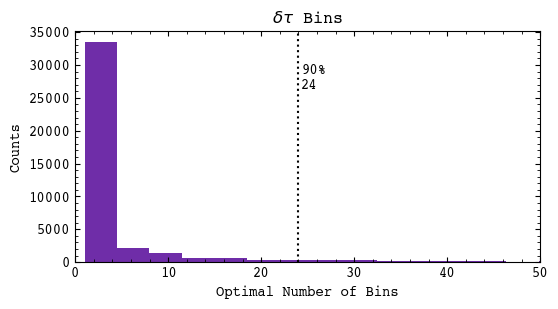

In [29]:
# Set ID
set_id = set_widget.value
# Describe 
describe = 'TEST2'

# Load BB
with open(f'{global_path}/{set_id}/nbin_BB-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_BB2-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list2 = pickle.load(file)
with open(f'{global_path}/{set_id}/nbin_BB206-{set_id}-{describe}.pickle', "rb") as file:
    bb_t_list206 = pickle.load(file)

print('90percentile t (BB): ', np.percentile(bb_t_list2, 90))

perc_t = np.percentile(bb_t_list2,98.25)
filt_t = [x for x in bb_t_list2 if x <= perc_t]

# binning_plotter(filt_E,show_percentiles = True, xlim =[0,30],nbins = 45, farbe = 'gruen',title = r'$\epsilon$ Bins')
# binning_plotter(filt_dt,show_percentiles = True, xlim =[0,35],nbins = 45, farbe = 'lila',title = r'$\delta\tau$ Bins')
binning_plotter(filt_t,show_percentiles = True, xlim =[0,50],nbins = 900, farbe = 'lila',title = r'$\delta\tau$ Bins')

# NT_binning_plotter(T_list,xlim = [0,180000], farbe = 'blau',T_or_N='T')
# NT_binning_plotter(N_list,xlim = [25,800], farbe = 'rot',T_or_N='N')



Archive

In [80]:
# t binning plotter
def NT_binning_plotter(list,show_percentiles = False,xlim = [0,800],farbe = 'schwarz', T_or_N = 'T'):
    # Define Colour Scheme
    google_blue = '#4285F4'
    google_red = '#DB4437'
    google_yellow = '#F4B400'
    google_green = '#0F9D58'
    google_purple = '#6f2da8'
    
    if farbe == 'blau':
        colour = google_blue
    elif farbe == 'rot':
        colour = google_red
    elif farbe == 'gelb':
        colour = google_yellow
    elif farbe == 'gruen':
        colour = google_green
    elif farbe == 'lila':
        colour = google_purple
    elif farbe == 'schwarz':
        colour = 'black'

    from matplotlib.font_manager import FontProperties

    # Register Latin Modern Sans Serif font with Matplotlib
    # font_path = '/Users/steven/Library/Fonts/cmunss.ttf'
    # font = FontProperties(fname=font_path)
    # plt.rcParams['font.sans-serif'] = font.get_name()

    # Define Font Settings
    plt.rcParams.update({'font.size': 11})
    # # Set the font family and path for the entire plot
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # plt.rcParams['font.sans-serif'] = 'Myriad'
    # plt.rcParams['font.sans-serif'] = 'Avenir'

    # Freedman-Diaconis rule N
    iqr = np.subtract(*np.percentile(list, [75, 25], axis=0)) #IQ range
    binwidth = 2 * iqr / (len(list) ** (1/3))
    nbins = int(np.ceil((max(list) - min(list)) / binwidth))
    
    # Create subplots 
    fig, axs = plt.subplots(1, 1, figsize=(6, 3))
    # Plot Energy Binning histograms
    if T_or_N == 'N':
        axs.hist(list, color = colour ,bins = nbins, edgecolor='white',linewidth=0.5)
        axs.set_xlabel(r'Eventfile Length $N$')
        # axs.set_title(r'Eventfile Length Distribution')
    else:
        list = np.array(list)/1000
        axs.hist(list, color = colour ,bins = nbins, edgecolor='white',linewidth=0.5)
        axs.set_xlabel(r'Eventfile Duration $T$ [ks]')
        # axs.set_title(r'Eventfile Duration Distribution')
    axs.set_xlim(xlim)
    axs.set_ylabel('Counts')
    axs.minorticks_on()
    axs.tick_params(which='both', direction='in', top=True, right=True)
    return

In [25]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
# font_manager.findfont("CMSS.ttf")

['/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf',
 '/System/Library/Fonts/KohinoorTelugu.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf',
 '/Library/Fonts/cmunsl.ttf',
 '/System/Library/Fonts/Apple Symbols.ttf',
 '/System/Library/Fonts/PingFang.ttc',
 '/System/Library/Fonts/Supplemental/Waseem.ttc',
 '/System/Library/Fonts/Supplemental/STIXNonUniBol.otf',
 '/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf',
 '/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc',
 '/System/Library/Fonts/Supplemental/Didot.ttc',
 '/Users/steven/Library/Fonts/BAHNSCHRIFT 10.TTF',
 '/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc',
 '/Users/steven/Library/Fonts/cmunbi.ttf',
 '/System/Library/Fonts/Symbol.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf',
 '/Users/steven/Library/Fonts/cmunbl.ttf',
 '/System

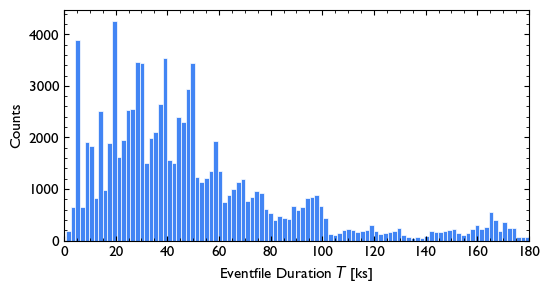

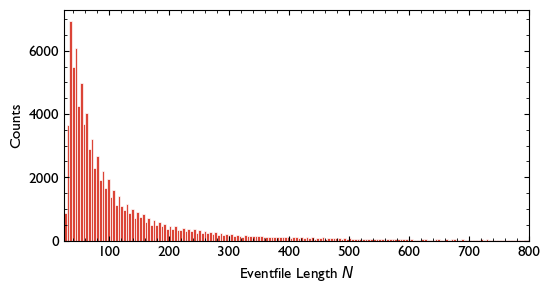

In [81]:
NT_binning_plotter(T_list,xlim = [0,180000/1000], farbe = 'blau',T_or_N='T')
NT_binning_plotter(N_list,xlim = [25,800], farbe = 'rot',T_or_N='N')